In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
from scipy.stats import binom

pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Generating Life Expectancy
r = np.random.choice(np.arange(30,100), 100)
r2 = np.append(binom.rvs(120, 0.7, size = 50), r)
life_expectancies = np.append(r2, [105, 78, 50, 60, 65, 73, 55, 70, 68, 64, 67, 69, 62, 81, 107, 5, 14])
generated_data = pd.DataFrame({'life expectancy': life_expectancies})
generated_data.head()

# Generating Random Cities
cities = ['Tokyo', 'Porto', 'New York', 'Paris', 'Bern']
rand_cities = np.random.choice(cities, 167)
generated_data['city'] = rand_cities
generated_data.head()

# Attaching a smoking status to each person
smokes = ['smoking', 'not smoking', 'social smoker']
rand_s = np.random.choice(smokes, 167, p = [0.5, 0.3, 0.2])
generated_data['smoking status'] = rand_s
generated_data.head()

# Adding income to each person
income = np.random.exponential(20, size = 167) * 1000
generated_data['income'] = np.round(income)

# Adding Separate Dataframe with Population information for cities
city_pop = pd.DataFrame(data={'city': generated_data.city.unique(),
                              'population': np.random.normal(5e6, 1e6, 5)})

generated_data.head()

,life expectancy,city,smoking status,income
0,89,Tokyo,not smoking,19372.00
1,87,New York,not smoking,43544.00
2,82,Tokyo,smoking,23202.00
3,89,New York,smoking,12628.00
4,81,Porto,social smoker,8351.00


In [3]:
city_pop.head()

,city,population
0,Tokyo,5883726.48
1,New York,4496499.24
2,Porto,4708108.17
3,Paris,3994515.50
4,Bern,4703689.53


# Question 2A: Distribution of Population for Different Cities

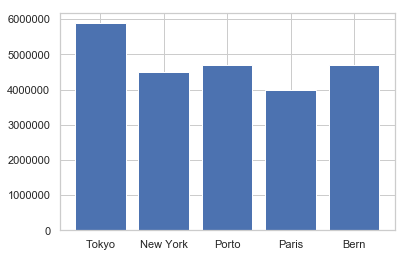

In [4]:
plt.bar(city_pop['city'], city_pop['population']);

# Question 2B: Distribution of Income

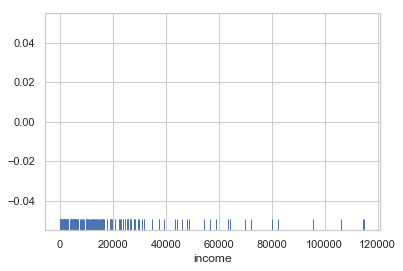

In [5]:
# Rug plot
sns.distplot(generated_data['income'], kde=False, rug=True, hist=False);

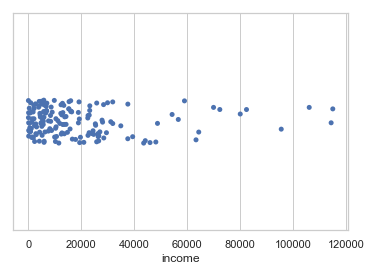

In [6]:
# Stripplot
ax = sns.stripplot(x=generated_data['income'])

# Question 2C: Income vs Life Expectancy

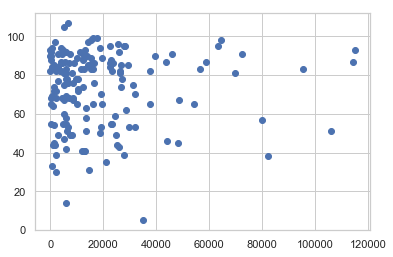

In [7]:
plt.scatter(x=generated_data['income'], y=generated_data['life expectancy']);

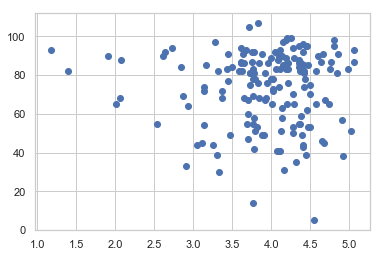

In [8]:
# Same plot but with logged income
plt.scatter(x=np.log10(generated_data['income']), y=generated_data['life expectancy']);

# Question 2D: Income for Different Cities

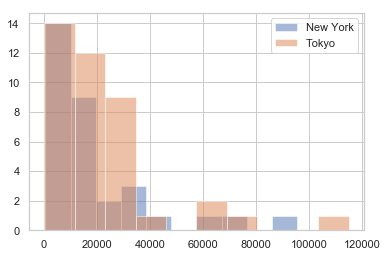

In [9]:
# Overlaid Histograms
plt.hist(x=generated_data[generated_data['city']=='New York']['income'], alpha=0.5, label='New York')
plt.hist(x=generated_data[generated_data['city']=='Tokyo']['income'], alpha=0.5, label='Tokyo')
plt.legend();

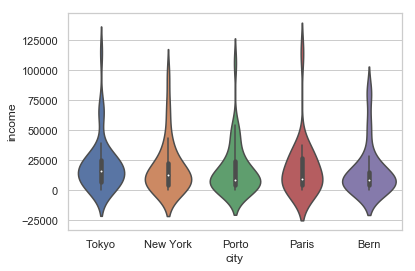

In [10]:
# Side by Side Violin Plots
sns.violinplot(x='city', y='income', data=generated_data);

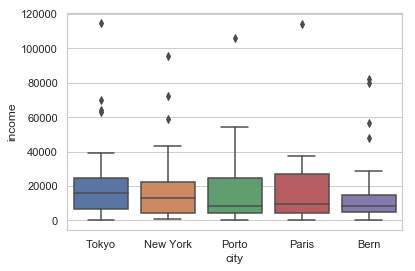

In [11]:
# Side by Side Box Plots

sns.boxplot(x='city', y='income', data=generated_data);

# Question 2E: Income, Life Expectancy, Smoking Status, City

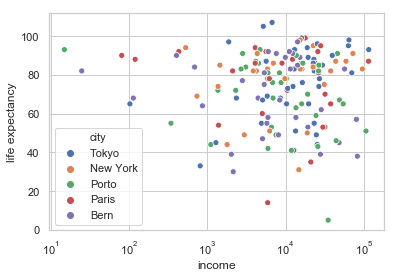

In [12]:
# Plotting income vs life expectancy and distinguishing city by color

f = sns.scatterplot(x='income', y='life expectancy', hue='city', data=generated_data)
f.set(xscale="log");

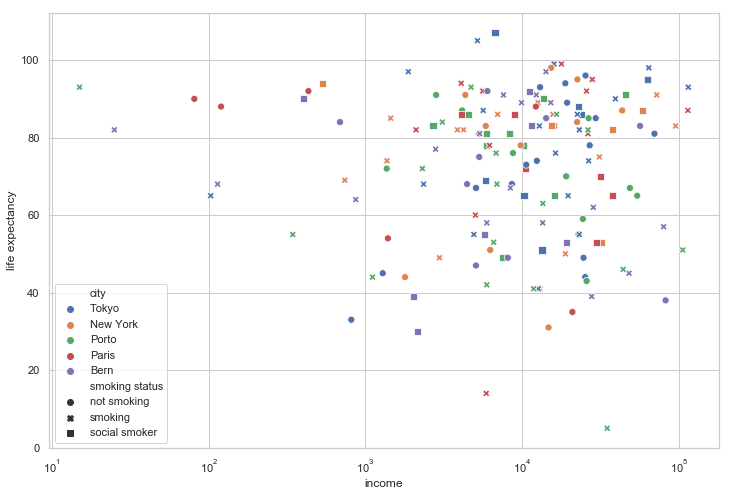

In [13]:
# Plotting income vs life expectancy, distinguishing city by color and smoking status by symbol

plt.figure(figsize=(12, 8))
f = sns.scatterplot(x='income', y='life expectancy', hue='city', 
                    style='smoking status', data=generated_data, s=50)
f.set(xscale="log");

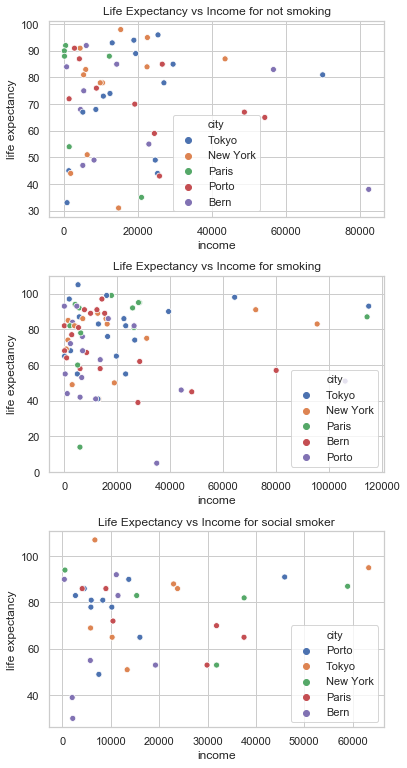

In [14]:
# Plotting income vs life expectancy, distinguishing city by color and gridding on smoking status

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(6, 13))
smoking_statuses = generated_data['smoking status'].unique()
ix = 0
for status in smoking_statuses:
    sns.scatterplot(x='income', y='life expectancy', hue='city', 
                    data=generated_data[generated_data['smoking status'] == status], ax=ax[ix])
    ax[ix].set_title(f'Life Expectancy vs Income for {status}')
    ix += 1
fig.subplots_adjust(hspace=0.3)